In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
from numpy import linalg;

In [2]:
df_Mendota = pd.read_csv("Mendota.csv");
df_Monona = pd.read_csv("Monona.csv");

In [3]:
## get the data from the csv
def Data_aquire(df):
    years = list(df["WINTER"]);
    
    days = list(df["DAYS"]);
    data_set = []; 
    
       
    def is_int(s):
        try:
            int(s);
            return True;
        except ValueError:
            return False;
        
    i = 0; 
    while i < len(years):  
        if len(years[i]) < 7 and type(years[i]) == str:
            years[i] = years[i-1];
        else:            
            years[i] = int(years[i][0:4]);           
        
        if is_int(days[i]):
            days[i] = int(days[i]);
        else:
            days[i] = False;            
        i += 1;  
       
    i = 0;
    while i < len(years):
        if years[i] < 1855 or years[i] > 2018:
            i += 1;
            continue;
        else:
            if i+1<len(years)-1:
                while years[i] == years[i+1]:
                    i += 1;
                    
                    if i >= len(years):
                        return  
                
            if days[i]:
                data_set.append([years[i],days[i]]);        
            i += 1;
    return data_set;
 

In [4]:
class Linear_regression:
    def __init__(self):
        pass
    
    def Load_data(self, Mendota,Monona):
        self.Mendota = Mendota;
        self.Monona = Monona;
        
    def Data_split(self, target_year):
        split = target_year - self.Mendota[0,0] + 1;
        self.Mendota_train = self.Mendota[:split,:];
        self.Mendota_test = self.Mendota[split:,:];
        self.Monona_train = self.Monona[:split,:];
        self.Monona_test = self.Monona[split:,:];
        
    def Quad_cost(self,y1,y2):
        return (y1-y2).dot(y1-y2);
    
    def Mean_Std(self,y):
        y_bar = np.mean(y);
        #y_std = ((y-y_bar).dot((y-y_bar)) / (len(y)-1)) ** 0.5
        y_std = (self.Quad_cost(y,y_bar) /(len(y)-1)) ** 0.5;
        return (y_bar,y_std);
    def Normalization(self,y):
        #m,v = self.Mean_Std(y);
        #y = (y - m)/(v);
        #y = y / len(y);
        y = (y - np.min(y));
        y =  y / np.max(y);
        
        return y;
    
    ## This is MLE method
    ## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    ## the training data here only has 1,x, ... ,and target has the ice days of lake mendota!!!
    def Train_without_regularization(self,training_data,target): 
        self.W_without_regualarization = linalg.pinv(training_data.T.dot(training_data)).dot(training_data.T).dot(target);
    def Pred_without_regularization(self,test_data):
        self.pred = test_data.dot(self.W_without_regualarization);
    def Test_without_regularization(self,y): ## y is the target
        LY = len(y);
        y_bar = np.mean(y);
        
        SS_total = (self.Quad_cost(y,y_bar)) /LY ;
        
        #bias = y - self.pred;
        SS_res = (self.Quad_cost(y,self.pred)) /LY;## mean square error
        
        R_2 = 1 - SS_res/SS_total;
        return SS_res, R_2;
    
    def Train_with_regularization(self, training_data, target, ridge, A):
        X = training_data.T;
        Y = target;
        R = X.dot(X.T) + ridge * A;
        self.W_with_regualarization = linalg.pinv(R).dot(X.dot(Y));
    def Pred_with_regularization(self,test_data, ridge, A):
        self.pred = test_data.dot(self.W_with_regualarization) + ridge *\
        self.W_with_regualarization.dot(A.dot(self.W_with_regualarization));
    
    ## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    
    ## WITH gradient descent
    ## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    def Derivative(self,x,pred,target): ## x is training data
        kernal = 2*(pred - target);
        kernal = kernal / len(kernal)
        return x.T.dot(kernal);
    def Forward(self,x,W):
        return x.dot(W);
        
    def Train_gradient_descent(self,training_data,target,epoch, learning_rate = 1e-1, regularization = 0, beta = 0):
        ## beta is the momentum
        #self.W_gradient = np.random.rand(len(training_data[0,:]));
        
        #training_data = training_data.reshape(len(training_data),-1);
        target = target.reshape(-1,1);########### IMPORTANT!!!!!!
        
        self.W_gradient = np.zeros((len(training_data[0,:]),1));        
      
        self.gradient_cost = [];
        
        ## init the momentum:
        #vdW = np.zeros(self.W_gradient.shape);
        vdW = False;
        
        i = 0;
        while i <= epoch:            
            self.Pred_gradient = self.Forward(training_data,self.W_gradient);            
            
            c = np.mean((self.Pred_gradient-target)**2);
            
            if i % 1 == 0:
                self.gradient_cost.append(c);
            
            delta_W = self.Derivative(training_data, self.Pred_gradient, target); 
            
            if type(vdW) == bool:
                vdW = delta_W;
            else:            
                vdW = (beta) * vdW + (1-beta) * delta_W;                
            
            self.W_gradient -= learning_rate * (vdW - regularization * self.W_gradient.T.dot(self.W_gradient));
            #self.W_gradient -= learning_rate * (vdW);
            i += 1;
        

## Q1

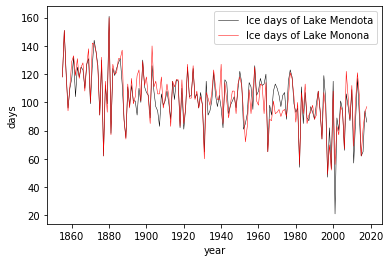

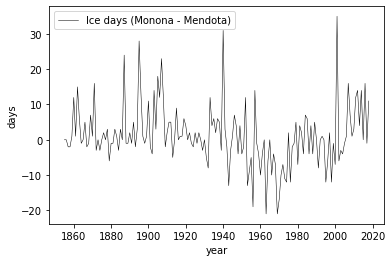

In [5]:
Mendota = np.array(Data_aquire(df_Mendota));
Monona = np.array(Data_aquire(df_Monona));

plt.figure();
plt.plot(Mendota[:,0],Mendota[:,1], label = "Ice days of Lake Mendota", c = 'k', linestyle = "-",linewidth = 0.5);
plt.plot(Monona[:,0],Monona[:,1], label = "Ice days of Lake Monona", c = 'r',linestyle = "-",linewidth = 0.5);
plt.xlabel("year");
plt.ylabel("days");
plt.legend();

plt.figure();
plt.plot(Mendota[:,0],-Mendota[:,1] + Monona[:,1], label = "Ice days (Monona - Mendota)", c = 'k', linestyle = "-",linewidth = 0.5);
plt.xlabel("year");
plt.ylabel("days");
plt.legend();
plt.show();

## Q2

In [6]:
Lakes = Linear_regression();

In [7]:
Lakes.Load_data(Mendota,Monona);
Lakes.Data_split(1970);

In [8]:
print("The sample mean and sample deviation for \"Mendota\" is -> ", np.round(Lakes.Mean_Std(Lakes.Mendota_train[:,1]), 3))
print("The sample mean and sample deviation for \"Monona\" is -> ", np.round(Lakes.Mean_Std(Lakes.Monona_train[:,1]), 3))

The sample mean and sample deviation for "Mendota" is ->  [107.19   16.747]
The sample mean and sample deviation for "Monona" is ->  [108.483  18.123]


## Q3

In [26]:
N = len(Lakes.Mendota_train);
X_train = np.ones((N,3)); ## X is the training data
X_train[:,1] = Lakes.Monona_train[:,0];
X_train[:,2] = Lakes.Monona_train[:,1];
Y_train = Lakes.Mendota_train[:,1];

Lakes.Train_without_regularization(X_train,Y_train)
print("The MLE values of β0, β1 and β2 are -> ", np.round(Lakes.W_without_regualarization,6));

The MLE values of β0, β1 and β2 are ->  [-6.4182766e+01  4.1225000e-02  8.5295100e-01]


## Q4

In [10]:
N = len(Lakes.Monona_test);

X_test = np.ones((N,3)); ## X is the training data
X_test[:,1] = Lakes.Monona_test[:,0];
X_test[:,2] = Lakes.Monona_test[:,1];
Y_test = Lakes.Mendota_test[:,1];

Lakes.Pred_without_regularization(X_test);
print("The (1) mean squared error and (2) R^2 values are -> ", Lakes.Test_without_regularization(Y_test));


The (1) mean squared error and (2) R^2 values are ->  (124.26409474395375, 0.7104900717847311)


In [11]:
'''
r,c = X_train.shape;
train_set = np.zeros((r,c+1));
train_set[:,:c] = X_train;
train_set[:,c] = Y_train;

r,c = X_test.shape;
test_set = np.zeros((r,c+1));
test_set[:,:c] = X_test;
test_set[:,c] = Y_test;

np.savetxt("train.csv",train_set , delimiter=",");
np.savetxt("test.csv", test_set, delimiter=",");
'''

'\nr,c = X_train.shape;\ntrain_set = np.zeros((r,c+1));\ntrain_set[:,:c] = X_train;\ntrain_set[:,c] = Y_train;\n\nr,c = X_test.shape;\ntest_set = np.zeros((r,c+1));\ntest_set[:,:c] = X_test;\ntest_set[:,c] = Y_test;\n\nnp.savetxt("train.csv",train_set , delimiter=",");\nnp.savetxt("test.csv", test_set, delimiter=",");\n'

## Q5

$$\frac{d}{d\beta} \frac{1}{n} \sum_{i=1}^n(x_i^T\beta - y_i)^2 = \frac{2}{n} \sum_{i=1}^nx\cdot(x_i^T\beta - y_i)  $$

## Q6

In [12]:
print("THE COST AT THE FIRST TEN STEPS")
Lakes.Train_gradient_descent(X_train,Y_train,10, learning_rate = 1e-1);
print("learning rate = 1e-1\n", np.round(Lakes.gradient_cost,3),"\n");
Lakes.Train_gradient_descent(X_train,Y_train,10, learning_rate = 1e-3);
print("learning rate = 1e-3\n", np.round(Lakes.gradient_cost,3),"\n");
Lakes.Train_gradient_descent(X_train,Y_train,10, learning_rate = 1e-5);
print("learning rate = 1e-5\n", np.round(Lakes.gradient_cost,3),"\n");
Lakes.Train_gradient_descent(X_train,Y_train,10, learning_rate = 1e-7);
print("learning rate = 1e-7\n", np.round(Lakes.gradient_cost,3),"\n");
Lakes.Train_gradient_descent(X_train,Y_train,10, learning_rate = 1e-9);
print("learning rate = 1e-9\n", np.round(Lakes.gradient_cost,3),"\n");


THE COST AT THE FIRST TEN STEPS
learning rate = 1e-1
 [1.17676550e+004 6.18035081e+015 3.33062678e+027 1.79489403e+039
 9.67278769e+050 5.21272121e+062 2.80916560e+074 1.51387558e+086
 8.15836303e+097 4.39658901e+109 2.36934723e+121] 

learning rate = 1e-3
 [1.17676550e+04 6.17868397e+11 3.32883049e+19 1.79344218e+27
 9.66235694e+34 5.20569567e+42 2.80462288e+50 1.51101986e+58
 8.14077721e+65 4.38592871e+73 2.36296488e+81] 

learning rate = 1e-5
 [1.17676550e+04 6.01316531e+07 3.15283853e+11 1.65311266e+15
 8.66768607e+18 4.54468614e+22 2.38289342e+26 1.24941104e+30
 6.55097681e+33 3.43484216e+37 1.80097426e+41] 

learning rate = 1e-7
 [11767.655  1110.113   356.58    303.272   299.471   299.171   299.117
   299.082   299.047   299.013   298.978] 

learning rate = 1e-9
 [11767.655 11599.894 11434.587 11271.698 11111.192 10953.034 10797.189
 10643.624 10492.306 10343.201 10196.277] 



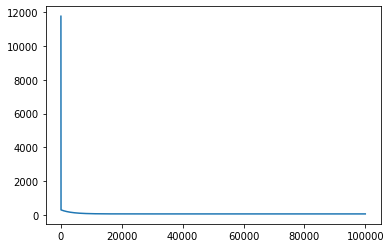

[[-1.90101929e-04]
 [ 9.38799582e-03]
 [ 8.22710113e-01]]


In [13]:
Lakes.Train_gradient_descent(X_train,Y_train,100000, learning_rate = 2e-7,beta = 0);
#print("learning rate = 1e-7\n", np.round(Lakes.gradient_cost,3),"\n");
plt.figure();
plt.plot(Lakes.gradient_cost)
plt.show();
print(Lakes.W_gradient)

In [14]:
Lakes.Train_without_regularization(X_train,Y_train)
print(Lakes.W_without_regualarization)

[-6.41827660e+01  4.12245663e-02  8.52950638e-01]


## Q7

In [15]:
X_train2 = np.array(X_train);
X_train2[:,1] = Lakes.Normalization(X_train2[:,1]);

X_train2[:,2] = Lakes.Normalization(X_train2[:,2]);
#Y_train = Lakes.Normalization(Y_train);
Lakes_norm = Linear_regression();
Lakes_norm.Train_gradient_descent(X_train2, Y_train, 100000, learning_rate = 0.1, regularization = 0, beta = 0.5)
print(np.round(Lakes_norm.gradient_cost,3));
Lakes_norm.W_gradient

[11767.655  5921.407  2567.223 ...    57.51     57.51     57.51 ]


array([[63.46584269],
       [ 4.74082514],
       [85.29506384]])

In [21]:
Lakes_norm.Train_without_regularization(X_train2,Y_train)
print("The MLE values of β0, β1 and β2 are -> ", np.round(Lakes_norm.W_without_regualarization,3));

The MLE values of β0, β1 and β2 are ->  [63.466  4.741 85.295]


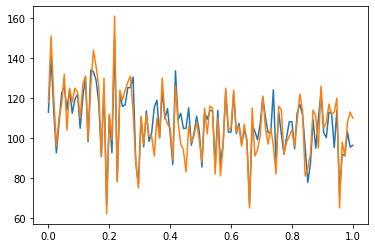

In [23]:
plt.figure();
plt.plot(X_train2[:,1],X_train2.dot(Lakes_norm.W_gradient), label = "");
plt.plot(X_train2[:,1],Y_train);

## Q8

In [18]:
X_train3 = np.array(X_train[:,0:2]);
Lakes.Train_without_regularization(X_train3,Y_train)
print("The MLE values of γ0 and γ1 are -> ", np.round(Lakes.W_without_regualarization,3));


The MLE values of γ0 and γ1 are ->  [ 4.06111e+02 -1.56000e-01]


## Q9

In [29]:
A = np.array([[0,0,0],[0,1,0],[0,0,1]]);
ridge = 1;
Lakes.Train_with_regularization(X_train,Y_train, ridge , A)
print("The MLE values of β0, β1 and β2 are -> ", np.round(Lakes.W_with_regualarization,6));

The MLE values of β0, β1 and β2 are ->  [-6.4166717e+01  4.1218000e-02  8.5292300e-01]
